# Importing required libraries

In [1]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import fashion_mnist
import numpy as np

Using TensorFlow backend.
C:\Users\SandeepReddy\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\SandeepReddy\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\SandeepReddy\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\SandeepReddy\Anaconda3\lib\site-packages\tensorflo

In [2]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats
# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics = ['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [3]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [4]:
history=autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 16s 270us/step - loss: 0.5353 - accuracy: 0.4440 - val_loss: 0.4643 - val_accuracy: 0.4797
Epoch 2/10
60000/60000 [==============================] - 13s 217us/step - loss: 0.4305 - accuracy: 0.4870 - val_loss: 0.4078 - val_accuracy: 0.4880
Epoch 3/10
60000/60000 [==============================] - 14s 225us/step - loss: 0.3964 - accuracy: 0.4917 - val_loss: 0.3886 - val_accuracy: 0.4912
Epoch 4/10
60000/60000 [==============================] - 13s 211us/step - loss: 0.3790 - accuracy: 0.4947 - val_loss: 0.3729 - val_accuracy: 0.4938
Epoch 5/10
60000/60000 [==============================] - 13s 208us/step - loss: 0.3647 - accuracy: 0.4970 - val_loss: 0.3605 - val_accuracy: 0.4964
Epoch 6/10
60000/60000 [==============================] - 13s 215us/step - loss: 0.3536 - accuracy: 0.4990 - val_loss: 0.3506 - val_accuracy: 0.4978
Epoch 7/10
60000/60000 [==============================]

# 1. Add more hidden layer to autoencoder

In [5]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
encoded1 = Dense(encoding_dim, activation='relu')(encoded)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(2*encoding_dim, activation='relu')(encoded1)
decoded1 = Dense(784, activation='sigmoid')(decoded)
# this model maps an input to its reconstruction
autoencoder1 = Model(input_img, decoded1)
# this model maps an input to its encoded representation
autoencoder1.compile(optimizer='adadelta', loss='binary_crossentropy', metrics = ['accuracy'])

In [6]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [7]:
history1=autoencoder1.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 59us/step - loss: 0.5308 - accuracy: 0.4392 - val_loss: 0.4360 - val_accuracy: 0.4872 accuracy: 0.
Epoch 2/10
60000/60000 [==============================] - 3s 53us/step - loss: 0.3965 - accuracy: 0.4906 - val_loss: 0.3827 - val_accuracy: 0.4851
Epoch 3/10
60000/60000 [==============================] - 3s 48us/step - loss: 0.3707 - accuracy: 0.4942 - val_loss: 0.3659 - val_accuracy: 0.4909
Epoch 4/10
60000/60000 [==============================] - 3s 49us/step - loss: 0.3575 - accuracy: 0.4968 - val_loss: 0.3555 - val_accuracy: 0.4989
Epoch 5/10
60000/60000 [==============================] - 3s 52us/step - loss: 0.3480 - accuracy: 0.4985 - val_loss: 0.3449 - val_accuracy: 0.4951
Epoch 6/10
60000/60000 [==============================] - 3s 55us/step - loss: 0.3392 - accuracy: 0.5004 - val_loss: 0.3347 - val_accuracy: 0.5013
Epoch 7/10
60000/60000 [==============================]

# 2. Do the prediction on the test data and then visualize one of the reconstructed version of that test data.Also, visualize the same test data before reconstructionusing Matplotlib

In [9]:
prediction = autoencoder1.predict(x_test[[0],:])

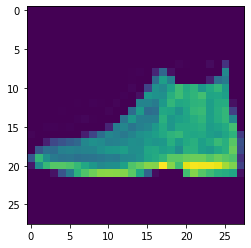

In [10]:
from matplotlib import pyplot as plt
plt.imshow(x_test[0].reshape(28,28))
plt.show()

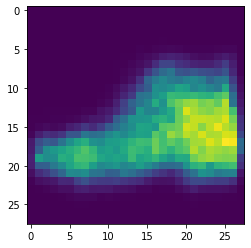

In [11]:
plt.imshow(prediction[0].reshape(28,28))
plt.show()

# 3.  Repeat the question 2 on the denoisening autoencoder

In [12]:
#introducing noise
#Add Noise to our MNNIST Dataset by sampling random values from Gaussian distribution by using np.random.normal() 
#and adding it to our original images to change pixel values
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

In [13]:
history2=autoencoder1.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 79us/step - loss: 0.3297 - accuracy: 0.5016 - val_loss: 0.3139 - val_accuracy: 0.0000e+00- loss: 0.331
Epoch 2/10
60000/60000 [==============================] - 3s 56us/step - loss: 0.3264 - accuracy: 0.5021 - val_loss: 0.3120 - val_accuracy: 0.0000e+00
Epoch 3/10
60000/60000 [==============================] - 3s 56us/step - loss: 0.3248 - accuracy: 0.5023 - val_loss: 0.3091 - val_accuracy: 0.0000e+00
Epoch 4/10
60000/60000 [==============================] - 3s 56us/step - loss: 0.3233 - accuracy: 0.5025 - val_loss: 0.3103 - val_accuracy: 0.0000e+00
Epoch 5/10
60000/60000 [==============================] - 4s 58us/step - loss: 0.3223 - accuracy: 0.5026 - val_loss: 0.3071 - val_accuracy: 0.0000e+00
Epoch 6/10
60000/60000 [==============================] - 3s 53us/step - loss: 0.3216 - accuracy: 0.5028 - val_loss: 0.3061 - val_accuracy: 0.0000e+00
Epoch 7/10
60000/60000 [=======

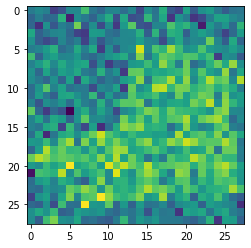

In [14]:
from matplotlib import pyplot as plt
plt.imshow(x_train_noisy[0].reshape(28,28))
plt.show()

In [15]:
prediction1 = autoencoder1.predict(x_train_noisy[[0],:])

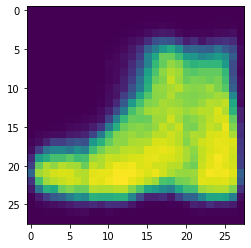

In [16]:
from matplotlib import pyplot as plt
plt.imshow(prediction1[0].reshape(28,28))
plt.show()

# 4.plot lossand accuracy using the history object

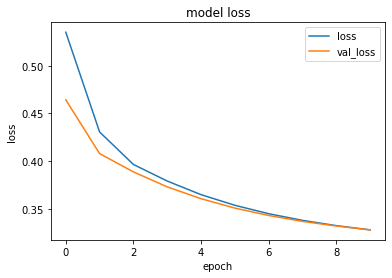

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['loss','val_loss'], loc='upper right')
plt.show()

# Bonus task

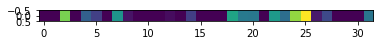

In [19]:
# this is our input placeholder
input_img = Input(shape=(784,))

# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)



encoder = Model(input_img, encoded)

encoder.compile(optimizer='adadelta', loss='binary_crossentropy',metrics=['accuracy'])


from keras.datasets import mnist, fashion_mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

encoded_imgs = encoder.predict(x_test[[0],:])

from matplotlib import pyplot as plt
plt.imshow(encoded_imgs)
plt.show()